In [2]:
from math import log
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import struct
import random
from codecs import decode
import matplotlib as mpl
from obspy import read

In [203]:
waveform = read("scedcws_webstp_1722134929267/20190101000000.CI.BAK.BHE.sac")

In [204]:
print(waveform.traces[0].stats)

         network: CI
         station: BAK
        location: 
         channel: BHE
       starttime: 2019-01-01T00:00:00.020000Z
         endtime: 2019-01-01T00:59:59.995000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 144000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -15204.0, 'depmax': 13784.0, 'b': 0.0, 'e': 3599.975, 'o': 0.0, 'stla': 35.34444, 'stlo': -119.10445, 'stel': 116.0, 'stdp': 0.0, 'depmen': -718.91516, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2019, 'nzjday': 1, 'nzhour': 0, 'nzmin': 0, 'nzsec': 0, 'nzmsec': 20, 'nvhdr': 6, 'npts': 144000, 'iftype': 1, 'idep': 5, 'leven': 1, 'lpspol': 0, 'lcalda': 1, 'kstnm': 'BAK', 'khole': '', 'kcmpnm': 'BHE', 'knetwk': 'CI', 'kinst': 'BHE', 'kevnm': ''})


In [3]:
# waveform = read("ci40664632/20240209214627.CJ.T000043.HNZ.sac")
waveform = read("../../git/CSN-UCI2061-Server/SACPARSE/scripts/20240606235200.CJ.T000971.HNZ.sac")


In [4]:
print(waveform.traces[0].stats)

         network: CJ
         station: T000971
        location: 
         channel: HNZ
       starttime: 2024-06-06T23:52:00.000000Z
         endtime: 2024-06-06T23:53:00.000000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 3001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.02, 'depmin': 0.964398, 'depmax': 1.086058, 'b': 0.0, 'e': 60.0, 'o': 0.0, 'stla': 33.645317, 'stlo': -117.84324, 'stel': 2.0, 'stdp': 0.0, 'user0': 2.0, 'depmen': 1.0243939, 'cmpaz': 90.0, 'cmpinc': 0.0, 'nzyear': 2024, 'nzjday': 158, 'nzhour': 23, 'nzmin': 52, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 3001, 'iftype': 1, 'idep': 8, 'istreg': 550, 'leven': 1, 'lpspol': 0, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'T000971', 'kcmpnm': 'HNZ', 'knetwk': 'CJ', 'kinst': 'HNZ', 'kevnm': ''})


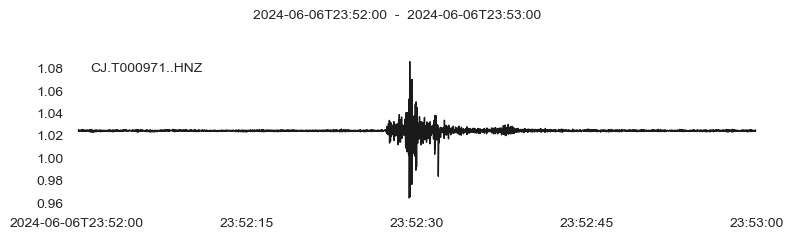

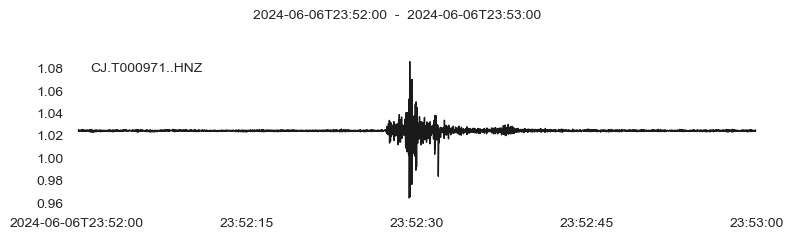

In [329]:
waveform.plot()

/home/tajk/miniconda3/envs/tf/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tajk/miniconda3/envs/tf/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

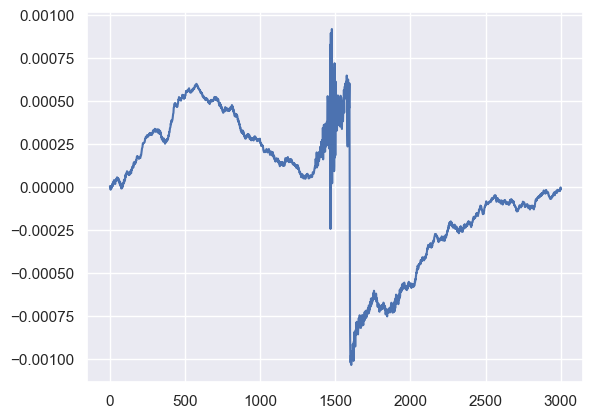

In [312]:
integrated = trap_integrate(waveform[0].data - np.mean(waveform[0].data))
sns.lineplot(x=np.arange(0, len(waveform[0])), y=integrated)

In [210]:
def exp_ideal(mean, randfloat) -> float:
    return -mean*np.log(randfloat)

In [5]:
len(waveform[0].data)

360001

In [6]:
waveform[0].stats.sampling_rate

100.0

In [5]:
def integrate(data, buffer_size = 1000):
    
    means = []
    integrated_values = []
    for index, element in enumerate(data):
        start = max(index - buffer_size, 0)
        end   = index + 1
        
        means.append( np.mean(data[start:end]))
    
        integrated_values.append((element - means[-1]) * 0.02 + (data[index - 1] if index > 0 else 0.0)*0.92)
    
    return np.array(integrated_values)

def trap_integrate(data):
    integrated_values = []
    for i in range(len(data)):
        if i == 0:
            value = 0
        else:
            value = (np.sum(data[:i-1]) + np.sum(data[1:i]))*0.02/2
        integrated_values.append(value)
    return np.array(integrated_values)

In [11]:
first_integral = integrate(waveform[0].data)
second_integral = integrate(first_integral)
print(first_integral)

[   0.         7425.425      7275.03       ... 7228.98048828 7405.99539551
 7613.76493652]


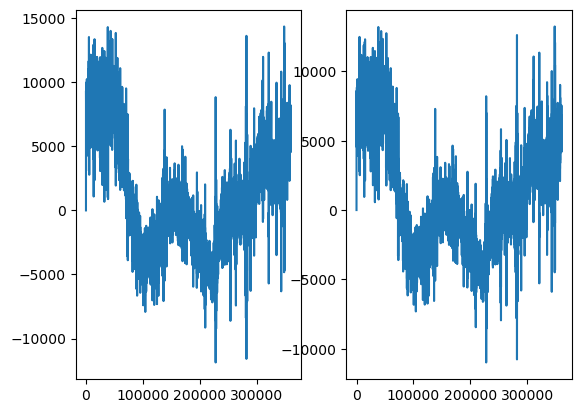

In [12]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(np.arange(0, len(first_integral)), first_integral)
axes[1].plot(np.arange(0, len(second_integral)), second_integral)


In [13]:
x = np.arange(1, 1000)
y = x



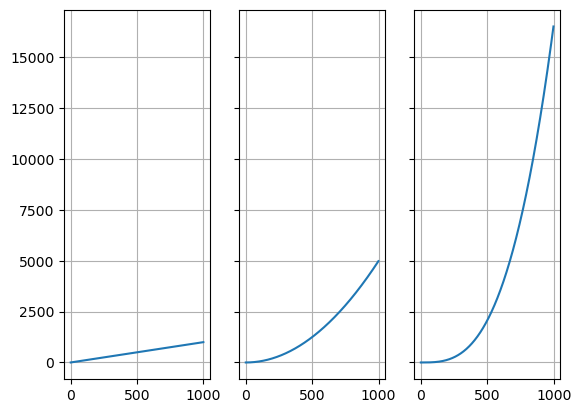

In [14]:
first_integral = trap_integrate(y)
second_integral = trap_integrate(first_integral)
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].plot(x, y)
axes[1].plot(np.arange(0, len(first_integral)), first_integral)
axes[2].plot(np.arange(0, len(second_integral)), second_integral)
axes[0].grid()
axes[1].grid()
axes[2].grid()

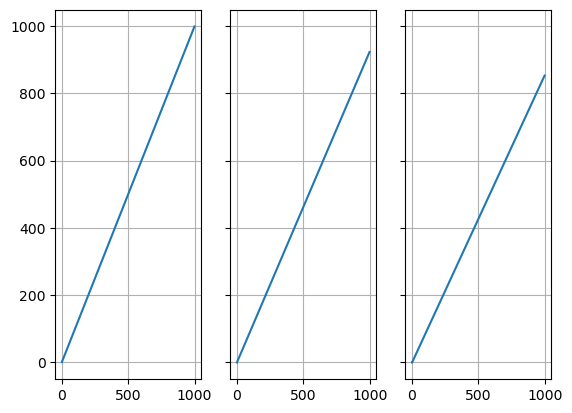

In [22]:
first_integral = integrate(y)
second_integral = integrate(first_integral)
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].plot(x, y)
axes[1].plot(np.arange(0, len(first_integral)), first_integral)
axes[2].plot(np.arange(0, len(second_integral)), second_integral)
axes[0].grid()
axes[1].grid()
axes[2].grid()

In [9]:
def exp_ideal(mean, randfloat) -> float:
    return -mean*np.log(randfloat)
    
def randint_to_float(rint):
    return float(int(rint >> 8) * (5.9604644775390625e-8))
def generate_noise(n = 10000, scale=0.025):
    noise = []
    for i in range(n):
        randfloat_a = randint_to_float(random.randint(0, 2**32-1))
        randfloat_b = randint_to_float(random.randint(0, 2**32-1))

        noise.append((float(scale*exp_ideal(1, randfloat_a) - scale*exp_ideal(1, randfloat_b))))
    return noise

# Load foostep-induced vibration dataset

In [6]:
import scipy.io
import seaborn as sns
sns.set_theme()

In [7]:
mat = scipy.io.loadmat('data.mat')

The data is organized into variables encoded by environment, lane, etc. Most importantly, each sensor contains a IMU X, Y, Z associated with the structural sensor. This is collected from a Geophone at 6500 Hz. 

In [8]:
def plot_imu(df, title = ""):
    fig, axes = plt.subplots(1, 3, figsize=(18.5, 10.5))
    _, _ = axes[0].psd(df.imu_x, Fs=6500)
    _, _ = axes[1].psd(df.imu_y, Fs=6500)
    _, _ = axes[2].psd(df.imu_z, Fs=6500)
    fig.suptitle(title)
    

In [135]:
keys = [key for key in mat if "__" not in key]

In [136]:
print(keys)

['P1_E1_S1_L1_SH1', 'P1_E1_S1_L2_SH1', 'P1_E1_S1_L3_SH1', 'P1_E1_S2_L1_SH1', 'P1_E1_S2_L2_SH1', 'P1_E1_S2_L3_SH1', 'P1_E1_S3_L1_SH1', 'P1_E1_S3_L2_SH1', 'P1_E1_S3_L3_SH1', 'P1_E1_S4_L1_SH1', 'P1_E1_S4_L2_SH1', 'P1_E1_S4_L3_SH1', 'P1_E1_S1_L1_SH2', 'P1_E1_S1_L2_SH2', 'P1_E1_S1_L3_SH2', 'P1_E1_S2_L1_SH2', 'P1_E1_S2_L2_SH2', 'P1_E1_S2_L3_SH2', 'P1_E1_S3_L1_SH2', 'P1_E1_S3_L2_SH2', 'P1_E1_S3_L3_SH2', 'P1_E1_S4_L1_SH2', 'P1_E1_S4_L2_SH2', 'P1_E1_S4_L3_SH2', 'P1_E1_S1_L1_SH3', 'P1_E1_S1_L2_SH3', 'P1_E1_S1_L3_SH3', 'P1_E1_S2_L1_SH3', 'P1_E1_S2_L2_SH3', 'P1_E1_S2_L3_SH3', 'P1_E1_S3_L1_SH3', 'P1_E1_S3_L2_SH3', 'P1_E1_S3_L3_SH3', 'P1_E1_S4_L1_SH3', 'P1_E1_S4_L2_SH3', 'P1_E1_S4_L3_SH3', 'P2_E1_S1_L1_SH1', 'P2_E1_S1_L2_SH1', 'P2_E1_S1_L3_SH1', 'P2_E1_S2_L1_SH1', 'P2_E1_S2_L2_SH1', 'P2_E1_S2_L3_SH1', 'P2_E1_S3_L1_SH1', 'P2_E1_S3_L2_SH1', 'P2_E1_S3_L3_SH1', 'P2_E1_S4_L1_SH1', 'P2_E1_S4_L2_SH1', 'P2_E1_S4_L3_SH1', 'P2_E1_S1_L1_SH2', 'P2_E1_S1_L2_SH2', 'P2_E1_S1_L3_SH2', 'P2_E1_S2_L1_SH2', 'P2_E1_S2_L

In [155]:
"P1_E1_S4_L1_SH1" in keys

True

In [277]:
print(mat["P1_E1_S1_L1_SH1"][0])

[(array([[493, 500, 499, ..., 507, 508, 504]], dtype=uint16), array([[462, 462, 459, ..., 468, 458, 456]], dtype=uint16), array([[372, 376, 374, ..., 364, 363, 364]], dtype=uint16), array([[460, 460, 460, ..., 471, 472, 478]], dtype=uint16))]


389297


/home/tajk/miniconda3/envs/tf/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tajk/miniconda3/envs/tf/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


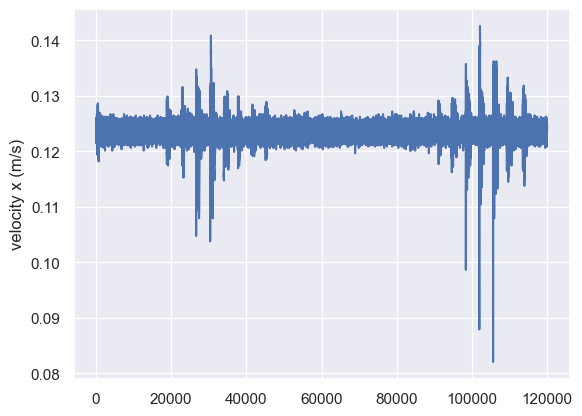

In [11]:
subset = list(mat["P1_E1_S2_L1_SH1"][0])[0]
df = pd.DataFrame({ "vibrations" : subset[0].flatten()[:120000]/(2**12)})
print(len(subset[0].flatten()))

ax = sns.lineplot(x=df.index, y=df.vibrations)
_ = ax.set(ylabel="velocity x (m/s)")

In [298]:
max(df.vibrations)

0.142578125

Text(0.5, 0.98, 'noise level 0.047')

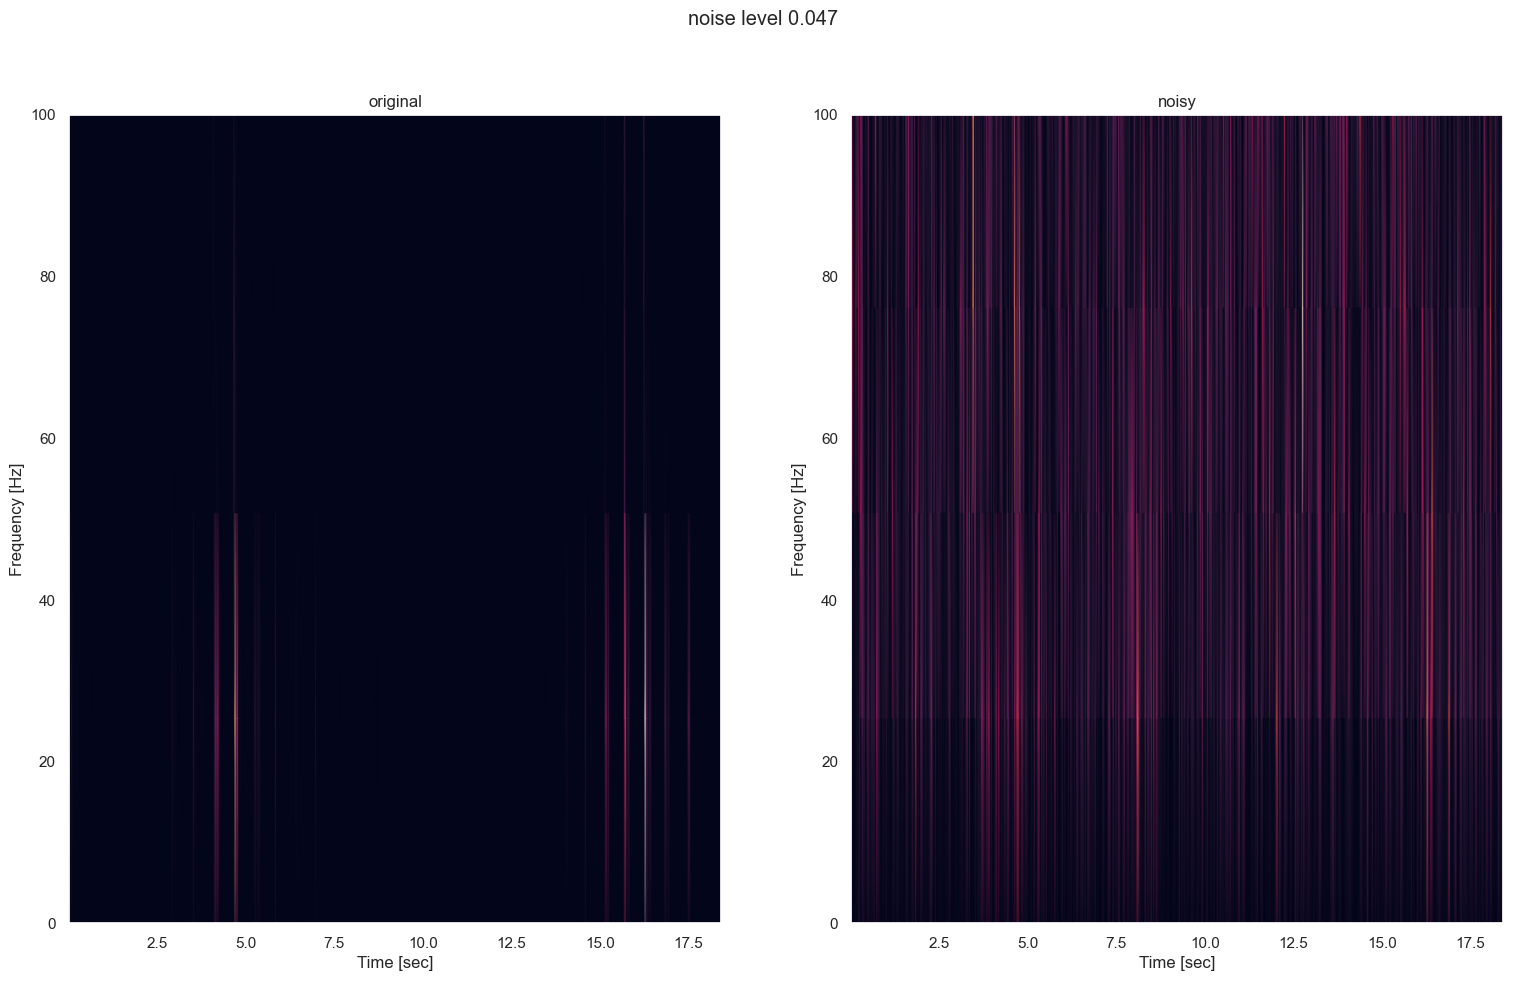

In [17]:
noise = generate_noise(len(df.vibrations), scale=0.047)



fig, axes = plt.subplots(1, 2, figsize=(18.5, 10.5))
ax = axes[0]
f, t, Sxx = scipy.signal.spectrogram(df.vibrations, fs=6500)
ax.pcolormesh(t, f, Sxx, shading='gouraud')
ax.set_ylim(0, 100)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title(f"original")


ax = axes[1]
f, t, Sxx = scipy.signal.spectrogram(df.vibrations + integrate(noise), fs=6500)
ax.pcolormesh(t, f, Sxx, shading='gouraud')
ax.set_ylim(0, 100)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title(f"noisy")
fig.suptitle("noise level 0.047")


Text(0.5, 0.98, 'noise level 0.037')

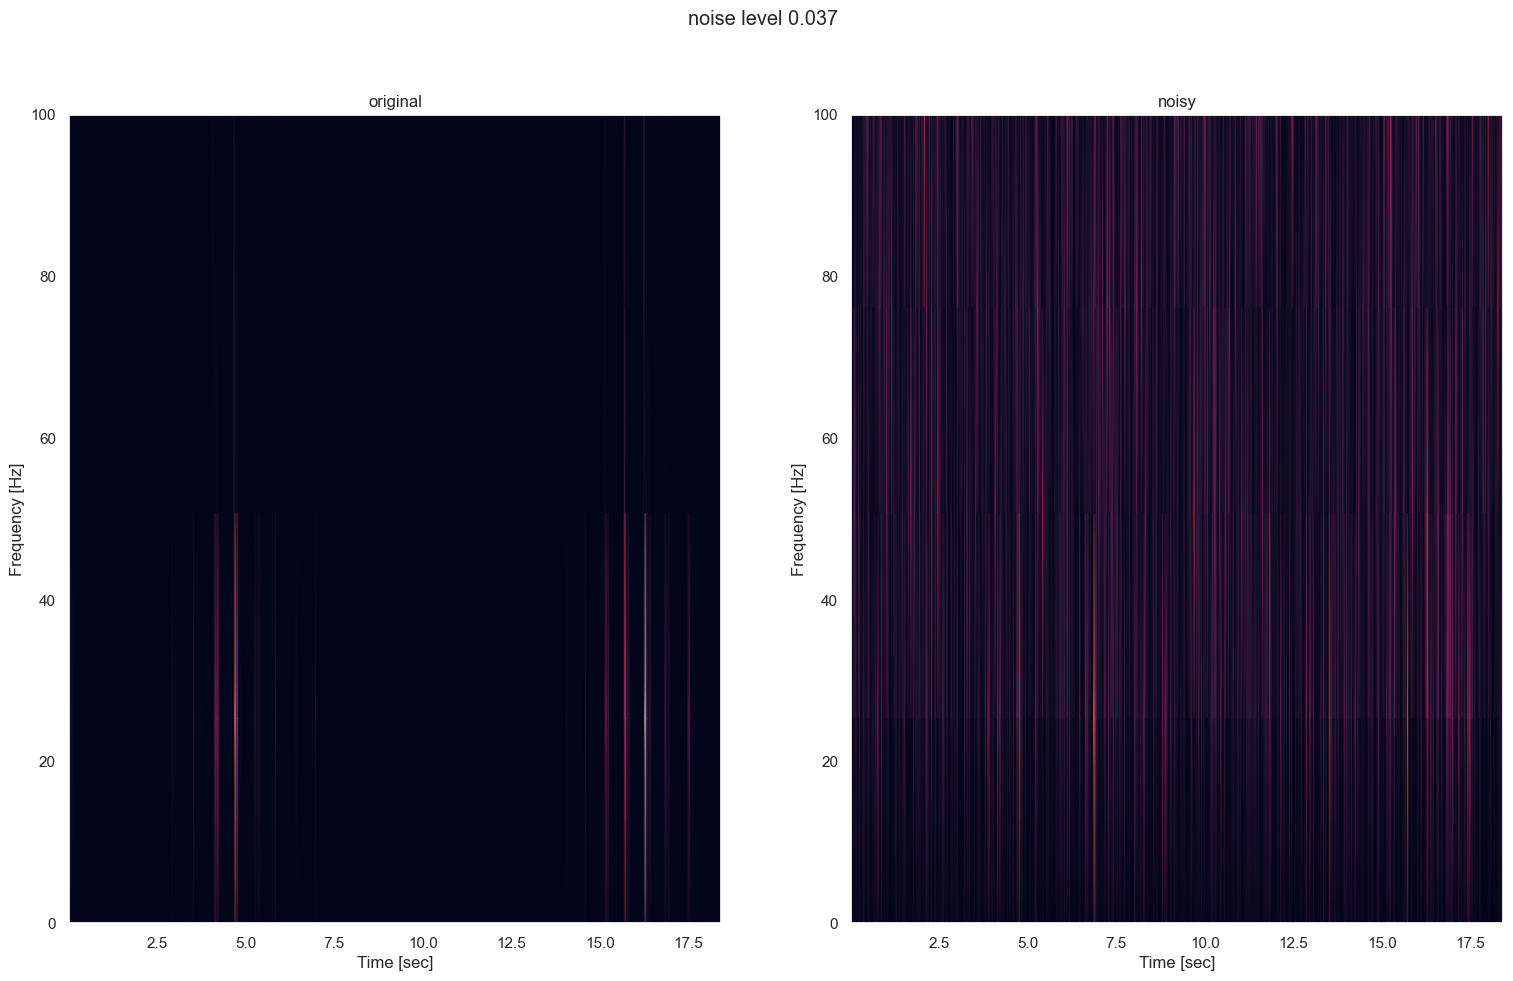

In [18]:
noise = generate_noise(len(df.vibrations), scale=0.037)



fig, axes = plt.subplots(1, 2, figsize=(18.5, 10.5))
ax = axes[0]
f, t, Sxx = scipy.signal.spectrogram(df.vibrations, fs=6500)
ax.pcolormesh(t, f, Sxx, shading='gouraud')
ax.set_ylim(0, 100)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title(f"original")


ax = axes[1]
f, t, Sxx = scipy.signal.spectrogram(df.vibrations + integrate(noise), fs=6500)
ax.pcolormesh(t, f, Sxx, shading='gouraud')
ax.set_ylim(0, 100)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title(f"noisy")
fig.suptitle("noise level 0.037")


In [400]:
for level in [0.1, 0.3, 0.5, 0.7, 1.0, 1.5]:
    noise = generate_noise(len(df.imu_x), scale=level*max(df.imu_x))

    fig, axes = plt.subplots(1, 2, figsize=(18.5, 10.5))
    ax = axes[0]
    f, t, Sxx = scipy.signal.spectrogram(df.imu_x, fs=6500)
    ax.pcolormesh(t, f, Sxx, shading='gouraud')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    ax.set_title(f"original")

    
    ax = axes[1]
    f, t, Sxx = scipy.signal.spectrogram(df.imu_x + noise, fs=6500)
    ax.pcolormesh(t, f, Sxx, shading='gouraud')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    ax.set_title(f"noise scaled {level}")
    

AttributeError: 'DataFrame' object has no attribute 'imu_x'

In [ ]:
# for key in keys[:5]:
#     subset = list(mat[key][0])[0]
#     df = pd.DataFrame({ #"vibrations" : subset[0].flatten(), 
#               "imu_x" : subset[1].flatten(), 
#               "imu_y" : subset[2].flatten(),
#               "imu_z" : subset[3].flatten()})
#     plot_imu(df, title=key)

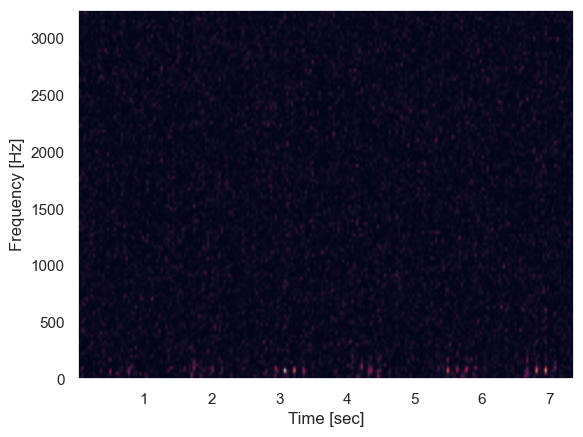

# Security simulation

In [20]:
samples = waveform[0].data - np.mean(waveform[0].data)
diffs = [samples[i] - samples[i-1] for i in range(1, len(samples))]

In [21]:
print(waveform[0].data)
print(samples)

[1.0251907 1.0241073 1.023664  ... 1.0236332 1.0240307 1.0250213]
[ 0.00079679 -0.00028658 -0.00072992 ... -0.00076067 -0.00036323
  0.0006274 ]


In [22]:
print(max(diffs))

0.08320731


Text(0.5, 1.0, 'displacement of sensor, with and without noise, @ 0.047g')

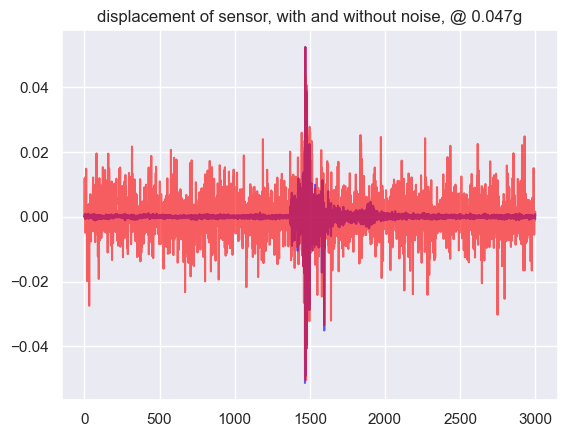

In [24]:
noise = generate_noise(len(samples), scale=0.0047)
integrals = [[] for i in range(3)]
noisy_integrals = [[] for i in range(3)]
integrals[0] = samples
integrals[1] = integrate(samples)
integrals[2] = integrate(integrals[1])

noisy_integrals[0] = noise + samples
noisy_integrals[1] = integrate(noisy_integrals[0])
noisy_integrals[2] = integrate(noisy_integrals[1])
backup_noisy = noisy_integrals

diffs_int2 = [integrals[2][i] - integrals[2][i-1] for i in range(1, len(integrals[2]))]

n_samples = 50
fig, axes = plt.subplots(1, 1)

axes.plot(np.arange(0, len(noisy_integrals[2])), integrals[2], color='blue', alpha=0.6, label="original")
axes.plot(np.arange(0, len(noisy_integrals[2])), noisy_integrals[2], color='red', alpha=0.6, label="noisy")

# axes.legend()
axes.set_title("displacement of sensor, with and without noise, @ 0.047g")

In [423]:
noise = generate_noise(len(samples), scale=0.0037)
integrals = [[] for i in range(3)]
noisy_integrals = [[] for i in range(3)]

In [424]:
integrals[0] = samples
integrals[1] = integrate(samples)
integrals[2] = integrate(integrals[1])

noisy_integrals[0] = noise + samples
noisy_integrals[1] = integrate(noisy_integrals[0])
noisy_integrals[2] = integrate(noisy_integrals[1])

diffs_int2 = [integrals[2][i] - integrals[2][i-1] for i in range(1, len(integrals[2]))]

Text(0.5, 1.0, 'displacement of sensor, with and without noise, @ 0.037g')

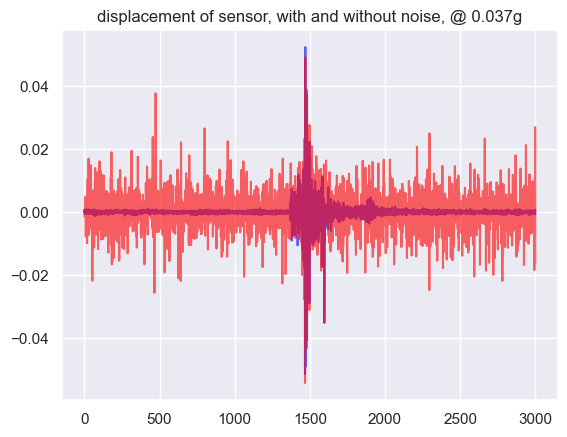

In [438]:
n_samples = 50
fig, axes = plt.subplots(1, 1)

axes.plot(np.arange(0, len(noisy_integrals[2])), integrals[2], color='blue', alpha=0.6, label="original")
axes.plot(np.arange(0, len(noisy_integrals[2])), noisy_integrals[2], color='red', alpha=0.6, label="noisy")
# axes.legend()
axes.set_title("displacement of sensor, with and without noise, @ 0.037g")


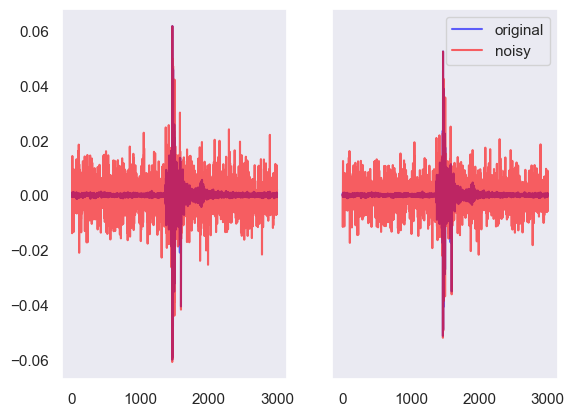

In [426]:

fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].plot(np.arange(0, len(integrals[0])), integrals[0], color='blue', alpha=0.6)
axes[0].plot(np.arange(0, len(integrals[0])), noisy_integrals[0], color='red', alpha=0.6)

axes[1].plot(np.arange(0, len(noisy_integrals[2])), integrals[2], color='blue', alpha=0.6, label="original")
axes[1].plot(np.arange(0, len(noisy_integrals[2])), noisy_integrals[2], color='red', alpha=0.6, label="noisy")

axes[1].legend()
axes[0].grid()
axes[1].grid()


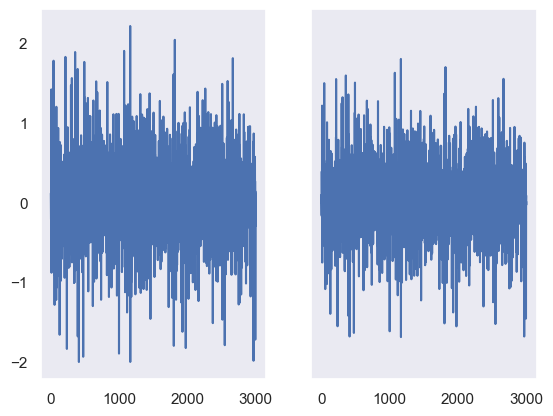

In [338]:
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].plot(np.arange(0, len(integrals[0])), (integrals[0] - noisy_integrals[0])/max(diffs))
axes[1].plot(np.arange(0, len(noisy_integrals[2])), (integrals[2] - noisy_integrals[2])/max(diffs))
axes[0].grid()
axes[1].grid()

Text(0.5, 0, 'displacement (2nd integral)')

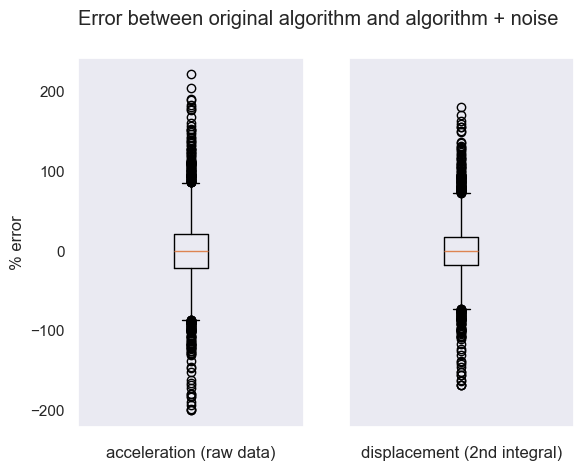

In [339]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle("Error between original algorithm and algorithm + noise")
axes[0].set_ylabel("% error")
axes[0].boxplot((integrals[0] - noisy_integrals[0])*100/max(diffs))
axes[1].boxplot((integrals[2] - noisy_integrals[2])*100/max(diffs))
axes[0].grid()
axes[1].grid()
axes[0].set_xticks([1],[""])
axes[1].set_xticks([1],[""])
axes[0].set_xlabel('acceleration (raw data)')
axes[1].set_xlabel('displacement (2nd integral)')

In [68]:
integrals[0] = samples
integrals[1] = trap_integrate(samples)
integrals[2] = trap_integrate(integrals[1])

noisy_integrals[0] = noise + samples
noisy_integrals[1] = trap_integrate(noisy_integrals[0])
noisy_integrals[2] = trap_integrate(noisy_integrals[1])

diffs_int2 = [abs(integrals[2][i] - integrals[2][i-1]) for i in range(1, len(integrals[2]))]
print(integrals[2])

[       0.              0.              0.       ... -3103146.136975
 -3103775.515075 -3104404.942175]


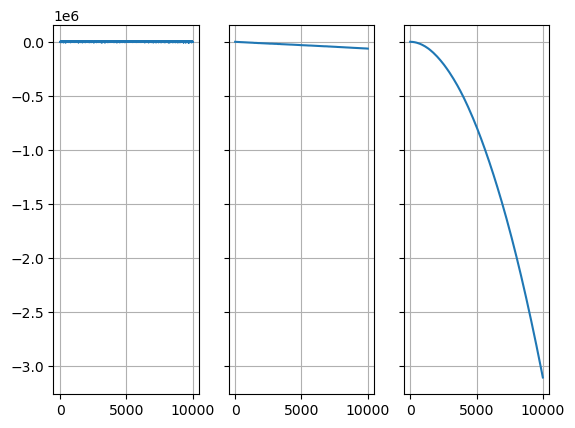

In [69]:
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].plot(np.arange(0, len(integrals[0])), integrals[0])
axes[1].plot(np.arange(0, len(integrals[1])), integrals[1])
axes[2].plot(np.arange(0, len(integrals[2])), integrals[2])
axes[0].grid()
axes[1].grid()
axes[2].grid()

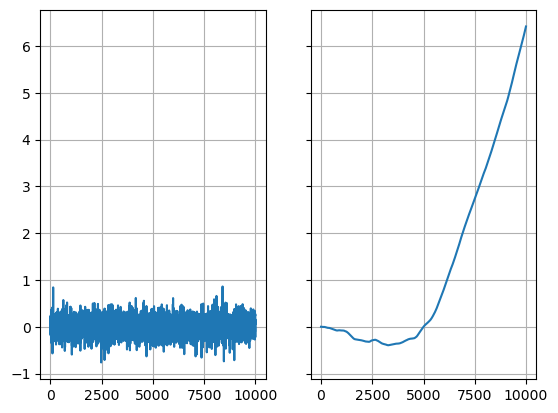

In [66]:
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].plot(np.arange(0, len(integrals[0])), (integrals[0] - noisy_integrals[0])/max(diffs))
axes[1].plot(np.arange(0, len(noisy_integrals[2])), (integrals[2] - noisy_integrals[2])/max(diffs))
axes[0].grid()
axes[1].grid()

Text(0.5, 0, 'displacement (2nd integral)')

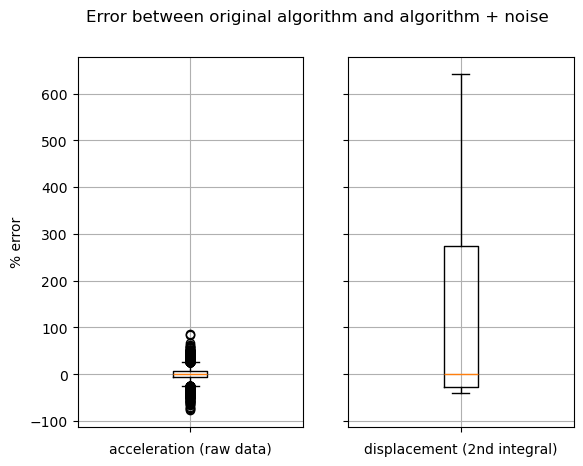

In [67]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle("Error between original algorithm and algorithm + noise")
axes[0].set_ylabel("% error")
axes[0].boxplot((integrals[0] - noisy_integrals[0])*100/max(diffs))
axes[1].boxplot((integrals[2] - noisy_integrals[2])*100/max(diffs))
axes[0].grid()
axes[1].grid()
axes[0].set_xticks([1],[""])
axes[1].set_xticks([1],[""])
axes[0].set_xlabel('acceleration (raw data)')
axes[1].set_xlabel('displacement (2nd integral)')